# Yeseo Kim_ Team 10

## 0 - Setting up the notebook

In [1]:
#pip install delorean
#!pip install faker
#!pip install seaborn

 ###  #1 import libraries 

In [2]:
# to create json
import json
# to use arrow library
import arrow
# to beautify the dates
import calendar
# to create random data
import random
# to use time libaray
from datetime import date, timedelta
# to create fake data
import faker

## 1 - Preparing the Data

### #2 instantiate the Faker

In [3]:
# create instance variable fake for using Faker library
fake = faker.Faker()

### #3 create user names

In [4]:
# set for preventing duplicated data
usernames = set()
# create 1000 user data
usernames_no = 1000

# generate fake user names till the number of username does not exceed 1000
while len(usernames) < usernames_no:
    usernames.add(fake.user_name())

### #4 create a list of users

In [5]:
# function for generating random info
def get_random_name_and_gender():
    skew = .6  # 60% of users will be female
    male = random.random() > skew # if the number exceeds 60% will be male
    
    # T/F ~ M/F 
    if male:
        # if True(male) then, activate the method name_male()
        return fake.name_male(), 'M'
    else:
        return fake.name_female(), 'F'

# function for creating complete user profile 
# and save list of JSON strings (users).
def get_users(usernames):
    # generate empty list 
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender() 
        user = {
            'username': username,
            'name': name,
            'gender': gender,
            'email': fake.email(),
            'age': fake.random_int(min=18, max=90),
            'address': fake.address(),
        }
        # encode python to json
        users.append(json.dumps(user))
    return users

#call function
users = get_users(usernames)
users[:3] #print out

['{"username": "molly94", "name": "Brittany Day", "gender": "F", "email": "martinezchristine@example.net", "age": 28, "address": "3476 Brittney Roads\\nLake Anna, TX 52247"}',
 '{"username": "kellycraig", "name": "Wesley Brennan", "gender": "M", "email": "matthew79@example.net", "age": 29, "address": "0836 Cabrera Terrace Suite 504\\nEast Scottshire, NV 17666"}',
 '{"username": "paulandrews", "name": "Gabriela Watkins", "gender": "F", "email": "mezacrystal@example.net", "age": 66, "address": "247 Stewart Squares Apt. 574\\nNorth Tyler, IL 70413"}']

### #5  generate campaign names


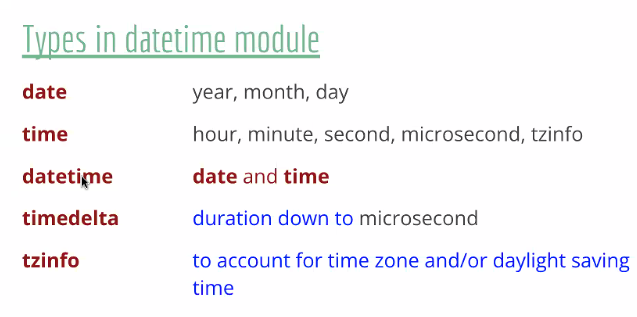

In [6]:
# campaign name format:
# InternalType_StartDate_EndDate_TargetAge_TargetGender_Currency

# function for internernal type
def get_type():
    types = ['AKX', 'BYU', 'GRZ', 'KTR']
    # random.choice to pick random types among 3 above.
    return random.choice(types)

# function for start and end dates
def get_start_end_dates():
    #duration for day 1 to 700 
    duration = random.randint(1, 2 * 365)
    offset = random.randint(-365, 365)
    #?
    start = date.today() - timedelta(days=offset)
    end = start + timedelta(days=duration)
    
    # function for converting date into string
    def _format_date(date_):
        return date_.strftime("%Y%m%d")
    
    return _format_date(start), _format_date(end)

# function for creating random age gap 
def get_age():
    age = random.randint(20, 45)
    #if number not exceeds 5, substract them, make it 0 (round)
    age -= age % 5
    diff = random.randint(5, 25)
    diff -= diff % 5
    return '{}-{}'.format(age, age + diff)

# function for generating gender 
def get_gender():
    return random.choice(('M', 'F', 'B'))

# function for choosing currency
def get_currency():
    return random.choice(('GBP', 'EUR', 'USD'))

#function for creating gibberish campaign name
def get_campaign_name():
    
    # use underscore to easily split them into elements
    separator = '_'
    
    # call all functions above to create fake campaign 'name'
    type_ = get_type()
    start_end = separator.join(get_start_end_dates())
    age = get_age()
    gender = get_gender()
    currency = get_currency()
    return separator.join(
        (type_, start_end, age, gender, currency))

### #6 create a complete campaign object

In [7]:
# campaign data:
# name, budget, spent, clicks, impressions

# function for creating campaign data
def get_campaign_data():
    name = get_campaign_name()
    budget = random.randint(10**3, 10**6) 
    spent = random.randint(10**2, budget)    
    
    #random.triangular(low, high [, mode])
    #returns a random number N drawn from a triangular distribution such that low <= N <= high
    #with the mode specified in the third argument, mode.
    clicks = int(random.triangular(10**2, 10**5, 0.2 * 10**5))    
    #?
    impressions = int(random.gauss(0.5 * 10**6, 2))
    return {
        'cmp_name': name,
        'cmp_bgt': budget,
        'cmp_spent': spent,
        'cmp_clicks': clicks,
        'cmp_impr': impressions
    }

### #7 assemble all elements together

In [8]:
# format:{'user': user_json, 'campaigns': [c1, c2, ...]}
# function to call campaign data x user data
def get_data(users):
    data = []
    for user in users:
        # matching every each users to 2 to 8 campaigns 
        campaigns = [get_campaign_data()
                     for _ in range(random.randint(2, 8))]
        # match user and campagin data into dictionary
        data.append({'user': user, 'campaigns': campaigns})
    return data

## 2 - Cleaning the data

### #8 cleaning rough user data

In [9]:
# call get_data function
rough_data = get_data(users)
rough_data[:2]  # print out

[{'user': '{"username": "molly94", "name": "Brittany Day", "gender": "F", "email": "martinezchristine@example.net", "age": 28, "address": "3476 Brittney Roads\\nLake Anna, TX 52247"}',
  'campaigns': [{'cmp_name': 'AKX_20231025_20240303_35-45_F_USD',
    'cmp_bgt': 445342,
    'cmp_spent': 181588,
    'cmp_clicks': 72786,
    'cmp_impr': 500000},
   {'cmp_name': 'BYU_20230311_20241031_20-30_B_GBP',
    'cmp_bgt': 978936,
    'cmp_spent': 462892,
    'cmp_clicks': 81061,
    'cmp_impr': 499999},
   {'cmp_name': 'AKX_20220708_20221226_35-55_B_GBP',
    'cmp_bgt': 549385,
    'cmp_spent': 7286,
    'cmp_clicks': 2998,
    'cmp_impr': 500001},
   {'cmp_name': 'BYU_20220118_20230619_25-30_B_GBP',
    'cmp_bgt': 648772,
    'cmp_spent': 131922,
    'cmp_clicks': 48165,
    'cmp_impr': 499998},
   {'cmp_name': 'BYU_20221027_20241016_25-45_F_GBP',
    'cmp_bgt': 23168,
    'cmp_spent': 22402,
    'cmp_clicks': 56581,
    'cmp_impr': 499999},
   {'cmp_name': 'AKX_20230811_20231229_20-35_F_GBP',

### #9 denormalize data 
Demnormalization is a process of restructing data into a single table 

In [10]:
# create a list of dictionarys  
data = []

# for loop to add user data into rough_data
for datum in rough_data:
    # datum pack 1: campaigns
    for campaign in datum['campaigns']:
        # datum pack 2: user
        campaign.update({'user': datum['user']})
        # patch user data into the rough_data
        data.append(campaign)
    # inner for loop ends
# outer for loop ends
data[:2]  # print out

[{'cmp_name': 'AKX_20231025_20240303_35-45_F_USD',
  'cmp_bgt': 445342,
  'cmp_spent': 181588,
  'cmp_clicks': 72786,
  'cmp_impr': 500000,
  'user': '{"username": "molly94", "name": "Brittany Day", "gender": "F", "email": "martinezchristine@example.net", "age": 28, "address": "3476 Brittney Roads\\nLake Anna, TX 52247"}'},
 {'cmp_name': 'BYU_20230311_20241031_20-30_B_GBP',
  'cmp_bgt': 978936,
  'cmp_spent': 462892,
  'cmp_clicks': 81061,
  'cmp_impr': 499999,
  'user': '{"username": "molly94", "name": "Brittany Day", "gender": "F", "email": "martinezchristine@example.net", "age": 28, "address": "3476 Brittney Roads\\nLake Anna, TX 52247"}'}]

### Creating the DataFrame

### #1 import analyzing/visualization libraries

In [11]:
# analyzing libraries
import numpy as np
from pandas import DataFrame
from delorean import parse
import pandas as pd

#visualization library
import matplotlib.pyplot as plt
plt.style.use(['classic','ggplot'])
# add seaborn library
import seaborn as sns

### #2 load data into a DataFrame

In [12]:
df = DataFrame(data)
df.head() # print out

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
0,AKX_20231025_20240303_35-45_F_USD,445342,181588,72786,500000,"{""username"": ""molly94"", ""name"": ""Brittany Day""..."
1,BYU_20230311_20241031_20-30_B_GBP,978936,462892,81061,499999,"{""username"": ""molly94"", ""name"": ""Brittany Day""..."
2,AKX_20220708_20221226_35-55_B_GBP,549385,7286,2998,500001,"{""username"": ""molly94"", ""name"": ""Brittany Day""..."
3,BYU_20220118_20230619_25-30_B_GBP,648772,131922,48165,499998,"{""username"": ""molly94"", ""name"": ""Brittany Day""..."
4,BYU_20221027_20241016_25-45_F_GBP,23168,22402,56581,499999,"{""username"": ""molly94"", ""name"": ""Brittany Day""..."


### #3 check how many rows we have

In [13]:
df.count()

cmp_name      5111
cmp_bgt       5111
cmp_spent     5111
cmp_clicks    5111
cmp_impr      5111
user          5111
dtype: int64

### #4 quick peek a stats summary of data

In [14]:
df. describe()

,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr
count,5111.000000,5111.000000,5111.000000,5111.00000
mean,497246.400117,249405.412639,39674.970456,499999.47975
std,287788.024111,221372.452116,21373.752210,2.02652
min,1225.000000,104.000000,634.000000,499992.00000
25%,246182.500000,68261.500000,22200.500000,499998.00000
50%,500198.000000,182292.000000,36563.000000,500000.00000
75%,737962.500000,381935.000000,54420.000000,500001.00000
max,999902.000000,991059.000000,99920.000000,500007.00000


### #5 quick peek with highest budgets

In [15]:
df.sort_values(by=['cmp_bgt'], ascending=False).head(3) # top3

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
36,BYU_20220615_20230107_20-30_M_USD,999902,713163,16112,500003,"{""username"": ""angelapowell"", ""name"": ""Jasmine ..."
923,BYU_20231105_20250715_25-35_F_GBP,999693,146157,46039,499998,"{""username"": ""mrobbins"", ""name"": ""Michael Mccl..."
3260,GRZ_20221026_20230420_35-50_B_EUR,999463,336475,10462,499997,"{""username"": ""sshah"", ""name"": ""Alexa Barber"", ..."


### #6 quick peek with lowest budgets

In [16]:
df.sort_values(by=['cmp_bgt'],ascending=False).tail(3) # bottom 3

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
3925,AKX_20220717_20230719_30-40_B_EUR,1701,632,57880,500002,"{""username"": ""ehanson"", ""name"": ""Jacob Moore"",..."
861,KTR_20230422_20231110_40-65_M_GBP,1587,882,60803,499998,"{""username"": ""lambryan"", ""name"": ""Barbara Shor..."
3545,KTR_20220329_20221010_30-45_B_USD,1225,635,19514,499998,"{""username"": ""qhughes"", ""name"": ""Susan Gilbert..."


# -----------------------------------presentation starts here-------------------------------

## 3 - Manipulating the DataFrame

### #7 compose results into a new DataFrame

In [17]:
# for analyzing, split the campaign name into parts.
# function to unpack fake datum
def unpack_campaign_name(name):
    # split them into underscore
    type_, start, end, age, gender, currency = name.split('_')

    # ?
    start = arrow.get(start, 'YYYYMMDD').date()
    end = arrow.get(end, 'YYYYMMDD').date()
    return type_, start, end, age, gender, currency

# variables to save each data 
# call function unpack campaign data
campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = [
    'Type', 'Start', 'End', 'Target Age', 'Target Gender', 'Currency']

# get a seperate dataframe
campaign_df = DataFrame(
    campaign_data.tolist(), columns=campaign_cols, index=df.index)


campaign_df.head(3) # print out

,Type,Start,End,Target Age,Target Gender,Currency
0,AKX,2023-10-25,2024-03-03,35-45,F,USD
1,BYU,2023-03-11,2024-10-31,20-30,B,GBP
2,AKX,2022-07-08,2022-12-26,35-55,B,GBP


### #8 join them

In [18]:
# join the two dataframes
df = df.join(campaign_df)

### #9 take a peek to see matching data

In [19]:
df[['cmp_name'] + campaign_cols].head(3) # print out

,cmp_name,Type,Start,End,Target Age,Target Gender,Currency
0,AKX_20231025_20240303_35-45_F_USD,AKX,2023-10-25,2024-03-03,35-45,F,USD
1,BYU_20230311_20241031_20-30_B_GBP,BYU,2023-03-11,2024-10-31,20-30,B,GBP
2,AKX_20220708_20221226_35-55_B_GBP,AKX,2022-07-08,2022-12-26,35-55,B,GBP


### #10 transform JSON into a list of its fields

In [20]:
# function to unpack user data (JSON)
def unpack_user_json(user):
    # strip into blank space
    # decode json to python
    user = json.loads(user.strip())
    return [
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address'],
    ]

# get seperate user data
user_data = df['user'].apply(unpack_user_json)

# column names
user_cols = [
    'username', 'email', 'name', 'gender', 'age', 'address']


# get a seperate dataframe for user data (split)
user_df = DataFrame(
    user_data.tolist(), columns=user_cols, index=df.index)

### #11 join them (like with campaign, check code #8)

In [21]:
# join
df = df.join(user_df)

### #12 quick peek the results

In [22]:
df[['user'] + user_cols].head(2) #print out

,user,username,email,name,gender,age,address
0,"{""username"": ""molly94"", ""name"": ""Brittany Day""...",molly94,martinezchristine@example.net,Brittany Day,F,28,"3476 Brittney Roads\nLake Anna, TX 52247"
1,"{""username"": ""molly94"", ""name"": ""Brittany Day""...",molly94,martinezchristine@example.net,Brittany Day,F,28,"3476 Brittney Roads\nLake Anna, TX 52247"


### #13 change column names into better ways

In [23]:
# change column names
better_columns = {
    'cmp_bgt':'Budget',
    'cmp_spent':'Spent',
    'cmp_clicks':'Clicks',
    'cmp_impr':'Impressions',
}
df.rename(columns=better_columns, inplace =True)

### #14 calculates all three ratios and adds to DataFrame

In [24]:
# function to add extra columns (CTR, CPC, CPI)
def calculate_extra_columns(df):
    # Click Through Rate
    df['CTR'] = df['Clicks'] / df['Impressions']
    # Cost Per Click
    df['CPC'] = df['Spent'] / df['Clicks']
    # Cost Per Impression
    df['CPI'] = df['Spent'] / df['Impressions']
    
# call function    
calculate_extra_columns(df)

### #15 quick peek the results by filtering 

In [25]:
df[['Spent', 'Clicks', 'Impressions',
    'CTR', 'CPC', 'CPI']].head(3) # print out

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,181588,72786,500000,0.145572,2.494820,0.363176
1,462892,81061,499999,0.162122,5.710416,0.925786
2,7286,2998,500001,0.005996,2.430287,0.014572


### #16 verify the accuracy of the results

In [26]:
# save first row data into variables
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]

CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]

print('CTR:', CTR, clicks / impressions)
print('CPC:', CPC, spent / clicks)
print('CPI:', CPI, spent / impressions) # print out

CTR: 0.145572 0.145572
CPC: 2.4948204325007555 2.4948204325007555
CPI: 0.363176 0.363176


### #17 add column tells us the duration/week of the campagin

In [27]:
# function to add the name of the Day when campaign starts
def get_day_of_the_week(day):
    return day.strftime('%A')
    
    '''
    # Longer version of code
    
    number_to_day = dict(enumerate(calendar.day_name, 1))
    return number_to_day[day.isoweekday()]

    '''
    
# function to get duration
def get_duration(row):
    return (row['End'] - row['Start']).days

# call function
df['Day of Week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration, axis=1)

### #18 verify the results in real quick

In [28]:
df[['Start', 'End', 'Duration', 'Day of Week']].head(3) #print out

,Start,End,Duration,Day of Week
0,2023-10-25,2024-03-03,130,Wednesday
1,2023-03-11,2024-10-31,600,Saturday
2,2022-07-08,2022-12-26,171,Friday


### #19 cleaning everything up that we can reassign to df itself

In [29]:
# to check upper-lowercases
df.columns

Index(['cmp_name', 'Budget', 'Spent', 'Clicks', 'Impressions', 'user', 'Type',
       'Start', 'End', 'Target Age', 'Target Gender', 'Currency', 'username',
       'email', 'name', 'gender', 'age', 'address', 'CTR', 'CPC', 'CPI',
       'Day of Week', 'Duration'],
      dtype='object')

In [30]:
# get rid of the cmp_name and user columns,
final_columns = [
    'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
    'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
    'CPI', 'Target Age', 'Target Gender', 'username', 'email',
    'name', 'gender', 'age'
]

# 12/2/2022 convert the uppercase to lowercase
df = df[final_columns]

## 4 - Saving to a file in different formats

### #20 save the data set as CSV

In [31]:
# CSV format
df.to_csv('Team10.csv')

In [32]:
# JSON format
# df.to_json('df.json')

In [33]:
# Spreadsheet format
# df.to_excel('df.xls')

# ------------------------------------------------ fin.----------------------------------------------------

## 5 - Visualizing results

In [34]:
%matplotlib inline
df.describe() # check

,Duration,Budget,Clicks,Impressions,Spent,CTR,CPC,CPI,age
count,5111.000000,5111.000000,5111.000000,5111.00000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000
mean,362.474271,497246.400117,39674.970456,499999.47975,249405.412639,0.079350,9.833091,0.498811,53.706515
std,209.650474,287788.024111,21373.752210,2.02652,221372.452116,0.042748,17.966110,0.442745,21.008794
min,1.000000,1225.000000,634.000000,499992.00000,104.000000,0.001268,0.002247,0.000208,18.000000
25%,182.000000,246182.500000,22200.500000,499998.00000,68261.500000,0.044401,1.854995,0.136523,35.000000
50%,358.000000,500198.000000,36563.000000,500000.00000,182292.000000,0.073126,4.920735,0.364583,54.000000
75%,545.500000,737962.500000,54420.000000,500001.00000,381935.000000,0.108840,11.489305,0.763869,71.000000
max,730.000000,999902.000000,99920.000000,500007.00000,991059.000000,0.199840,680.446372,1.982118,90.000000


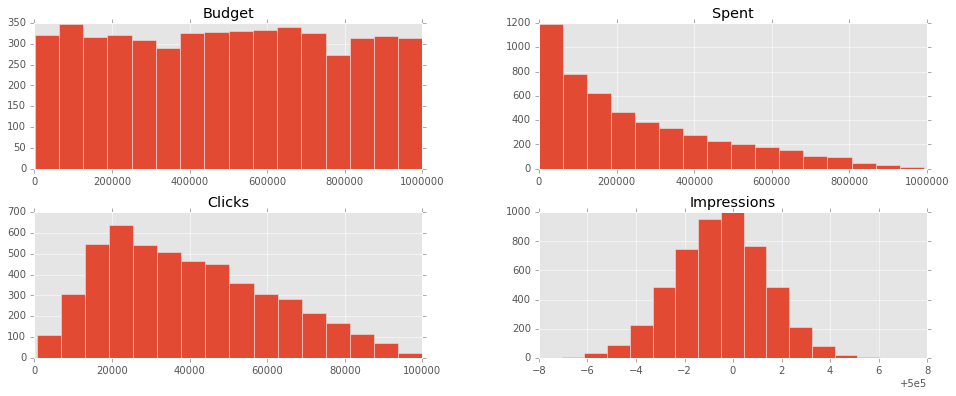

In [35]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
    bins=16, figsize=(16, 6));

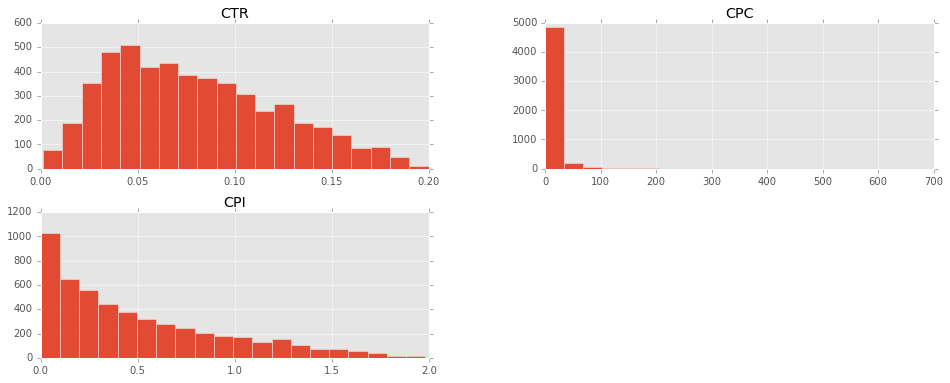

In [36]:
df[['CTR', 'CPC', 'CPI']].hist(
    bins=20, figsize=(16, 6));

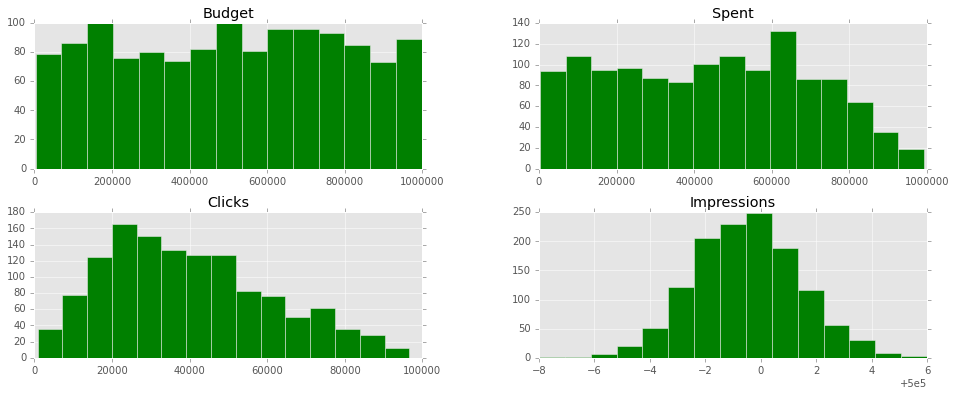

In [37]:
# prepare selector
# to filter out all rows less than 75% of the budget
# TypeError occurs!
selector = df.Spent > .75 * df.Budget
df[selector][['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=15, figsize=(16, 6), color='green');

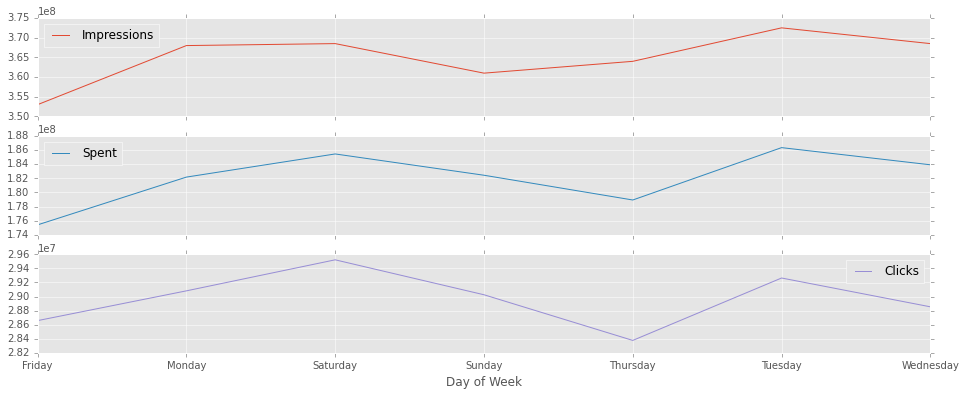

In [38]:
# aggregate per Day of the Week
df_weekday = df.groupby(['Day of Week']).sum()
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(
    figsize=(16, 6), subplots=True);

In [39]:
# aggregate per gender
agg_config = {
    'Impressions':  ['mean','std'],
    'Spent': ['mean', 'std'],
}

df.groupby(['Target Gender', 'Target Age']).agg(agg_config)

Impressions                    Spent  \
                                   mean       std           mean   
Target Gender Target Age                                           
B             20-25       499999.137500  1.900991  248591.162500   
              20-30       499999.404040  1.932109  254412.474747   
              20-35       499999.534247  2.327864  217524.123288   
              20-40       499999.550000  2.128171  265800.975000   
              20-45       499999.176471  2.833622  275639.235294   
...                                 ...       ...            ...   
M             45-50       499999.307692  2.323238  251748.769231   
              45-55       499998.538462  2.025479  285485.538462   
              45-60       499998.666667  1.676163  359533.066667   
              45-65       499998.368421  2.113726  188034.263158   
              45-70       500000.333333  1.527525  384824.000000   

                                         
                                    std  
Target Gender Target Age                 
B             20-25       216599.831959  
              20-30       201373.465635  
              20-35       175387.367371  
              20-40       238722.093345  
              20-45       210257.466399  
...                                 ...  
M             45-50       213870.616334  
              45-55       186237.656446  
              45-60       255811.314563  
              45-65       217777.918008  
              45-70       280244.658128  

[90 rows x 4 columns]

In [40]:
# creating pivot table
pivot = df.pivot_table(
    values=['Impressions', 'Clicks', 'Spent'],
    index=['Target Age'],
    columns=['Target Gender'],
    aggfunc=np.sum
)
pivot

Clicks                   Impressions                      \
Target Gender        B        F        M           B         F         M   
Target Age                                                                 
20-25          3102483  2254673  2464360    39999931  30999961  34999944   
20-30          4093772  2910292  3254604    49499941  37999954  36999952   
20-35          2765756  2852936  3548486    36499966  40999961  40499963   
20-40          3140961  2935088  2335654    39999964  35999953  31499993   
20-45           820933   752243   729329     8499986   9999998   9499985   
25-30          2616690  3398477  4234271    31999948  41499915  49499973   
25-35          3016237  3536141  3157900    36999961  41499975  38499968   
25-40          2719095  2507753  3779491    36999959  31499967  44499946   
25-45          3299763  3258623  3026245    38499959  37999936  37999937   
25-50           670054   513290   850484     7999989   6499992  10999978   
30-35          3311904  3399888  2453251    39499982  41499961  34999941   
30-40          3501053  3209250  3175467    45499969  41499970  42999962   
30-45          2863931  3816231  3239513    33999989  44999961  37499952   
30-50          2973965  2335436  2713348    39999960  31499943  31999964   
30-55           565556   635600   609694     8499995   8500001   6999997   
35-40          2662423  2833942  2690478    33499961  37499959  36499936   
35-45          3648407  2964838  2643371    46499963  35999944  32999966   
35-50          3326726  2652972  2782423    37499950  35999974  35999970   
35-55          3608461  3275040  2387067    44499946  40499970  30499966   
35-60           809886   656135   635087    10499982   7999998   9499986   
40-45          3144623  3840707  2459485    40999998  47999950  32499966   
40-50          3218264  2796667  2776854    43499948  36499995  37999953   
40-55          2790444  3438081  3002413    34999999  43499951  41499976   
40-60          3216422  3928088  2494508    42499942  44999950  30499959   
40-65           498607   728391   930416     7499990   9999977   9999992   
45-50           854487  1117003   416351    10000009  15500010   6499991   
45-55           673559   819709   579412     8499991   9499989   6499981   
45-60           739071   412816   535873     7499998   5499999   7499980   
45-65           696283   520125   720252     7999998   7500010   9499969   
45-70           166520   188788   147128     1999992   2000004   1500001   

                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          19887293  17403476  15252869  
20-30          25186835  19224785  18534452  
20-35          15879261  20627908  23482037  
20-40          21264078  14134298  15078184  
20-45           4685867   5567590   4399548  
25-30          16584625  20082421  26518400  
25-35          17605406  19768307  20387066  
25-40          16350961  14679809  22857294  
25-45          17995242  18951691  20600752  
25-50           4499163   3954291   5298162  
30-35          21099132  21078606  17942912  
30-40          23920203  18645565  19372674  
30-45          18198298  26344808  18063137  
30-50          22284719  15278670  17251314  
30-55           3328141   3102179   2247284  
35-40          16436304  17990922  17210130  
35-45          22924184  19013336  15573945  
35-50          20728075  15843652  18530520  
35-55          18501474  22466096  15972386  
35-60           4012796   3243748   3636104  
40-45          16606102  21702423  15787169  
40-50          21151723  19666232  16659940  
40-55          18844508  22671844  22912656  
40-60          21063355  22869359  16588456  
40-65           4700399   3922221   4565697  
45-50           4010067  10423138   3272734  
45-55           4712874   4695862   3711312  
45-60           5331912   3428451   5392996  
45-65           3561370   3049560   3572651  
45-70            616881   1081315  

### First code review : 11/30/2022
- understand all codes above.

### Second code review : 12/2/2022 
- add more comments on section 3.
- improve codes to fix bugs in unpack_campaign_name, final_cols, selector and agg_config
- import arrow library at the beginning